In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Flatten,Activation,Dense,Dropout
from keras import backend as k
#from keras.application import 

train_path="G:/Datasets/dogs-cats-images/dataset/training_set"
validating_path="G:/Datasets/dogs-cats-images/dataset/test_set"
test_path="G:/Datasets/extra_datasets/Test_Set"
img_width,img_height=32,32
epochs=2
batch_size=1
channels=3
input_shape=(img_width,img_height,3)
datagen=ImageDataGenerator(rescale=1./255,rotation_range=5,zoom_range=0.2,horizontal_flip=True)
validate_datagen=ImageDataGenerator(rescale=1./255)
train_generator=datagen.flow_from_directory(
    train_path,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode= None,
    color_mode='rgb')
validation_generator=validate_datagen.flow_from_directory(validating_path,
                                                          target_size=(img_width,img_height),
                                                          batch_size=batch_size,
                                                          class_mode='binary')
i=0;
list=[]
for image in train_generator:
    list.append(image)
    i=i+1
    if i>5:
        break
for image in list:
    plt.imshow(np.squeeze(image))
    plt.show()

Using TensorFlow backend.


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

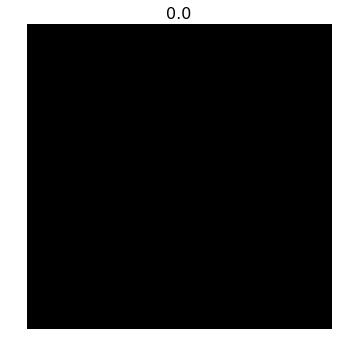

In [2]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
imgs, labels=next(validation_generator)
plots(imgs, titles=labels)

In [3]:
#model=Sequential()
#model.add(Conv2D(96,(11,11),strides=(4,4),input_shape=(227,227,3),activation='relu'))
#model.add(MaxPooling2D((3,3),strides=(2,2)))
#model.add(Conv2D(256,(5,5),padding='same',activation='relu'))
#model.add(MaxPooling2D((3,3),strides=(2,2)))
#model.add(Conv2D(384,(3,3),padding='same',activation='relu'))
#model.add(Conv2D(384,(3,3),padding='same',activation='relu'))
#model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
#model.add(MaxPooling2D((3,3),strides=(2,2)))
#model.add(Flatten())
#model.add(Dense(9216,activation='tanh'))
#model.add(Dropout(0.5))
#model.add(Dense(4096,activation='tanh'))
#model.add(Dropout(0.5))
#model.add(Dense(4096,activation='tanh'))
#model.add(Dense(2,activation='softmax'))
          


In [4]:
model=Sequential()
model.add(Conv2D(6,kernel_size=(5,5),strides=(1,1),padding='valid',input_shape=(img_height,img_width,channels)))
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(16,kernel_size=(5,5),padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
#model.add(Conv2D(384,kernel_size=(3,3),padding='same'))
#model.add(BatchNormalization())
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
    
#model.add(Conv2D(384,kernel_size=(3,3),padding='same'))
#model.add(BatchNormalization())
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Conv2D(256,kernel_size=(3,3),padding='same'))
#model.add(BatchNormalization())
#model.add(Activation('relu')) 
#model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))


model.add(Flatten())
#model.add(Dense(2048,activation='tanh'))

model.add(Dense(120,activation='tanh'))
#model.add(Dropout(0.5))
model.add(Dense(84,activation='tanh'))
#model.add(Dropout(0.5))
#model.add(Dense(4096,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

In [5]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 6)         0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 16)        64        
_________________________________________________________________
activation_2 (Activation)    (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
__________

In [7]:
batch_size=128
train_generator=datagen.flow_from_directory(
    train_path,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='rgb')

test_generator=validate_datagen.flow_from_directory(validating_path,
                                                    color_mode='rgb',
                                                    target_size=(img_height,img_width),
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    shuffle=False
                                                    
                                                    
)
model.fit_generator(generator=train_generator,
                    steps_per_epoch=50,
                    validation_steps=10,
                    validation_data=test_generator,
                    epochs=10)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/10
50/50 [==============================] - 254s 5s/step - loss: 0.6715 - acc: 0.5816 - val_loss: 0.7579 - val_acc: 0.4797
Epoch 2/10
50/50 [==============================] - 84s 2s/step - loss: 0.6181 - acc: 0.6581 - val_loss: 0.6082 - val_acc: 0.6631
Epoch 3/10
50/50 [==============================] - 40s 791ms/step - loss: 0.6000 - acc: 0.6674 - val_loss: 0.8793 - val_acc: 0.4766
Epoch 4/10
50/50 [==============================] - 39s 785ms/step - loss: 0.5887 - acc: 0.6880 - val_loss: 0.6957 - val_acc: 0.5601
Epoch 5/10
50/50 [==============================] - 40s 793ms/step - loss: 0.5786 - acc: 0.6889 - val_loss: 0.6497 - val_acc: 0.6226
Epoch 6/10
50/50 [==============================] - 39s 787ms/step - loss: 0.5713 - acc: 0.6961 - val_loss: 0.7234 - val_acc: 0.5516
Epoch 7/10
50/50 [==============================] - 39s 785ms/step - loss: 0.5675 - acc: 0.6987 - val_loss: 0.6563 - val_ac

In [ ]:
from keras.preprocessing import image
import cv2
img="D:/Try/dog.jpg"

#for img in os.listdir(path):
imge = cv2.imread(img)
img1=cv2.resize(imge, (32,32))
plt.imshow(img1,cmap="gray")
        
plt.show()
        #x = image.img_to_array(img1)
       
        #x = np.expand_dims(x, axis=0)
        #print(model.predict(x))
        


x = image.img_to_array(img1)
x/=255

x = np.expand_dims(x, axis=0)

print(x.shape)


print(model.predict(x))